# 1. Import and Install Dependencies

!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic  # Holistic model
mp_drawing = mp.solutions.drawing_utils  # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False  # Image is no longer writeable
    results = model.process(image)  # Make prediction
    image.flags.writeable = True  # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    # Draw face landmarks
    if results.face_landmarks:
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)  # Face landmarks
    # Draw pose landmarks
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)  # Pose landmarks
    # Draw left hand landmarks
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)  # Left hand landmarks
    # Draw right hand landmarks
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)  # Right hand landmarks


In [5]:
def draw_styled_landmarks(image, results):
    # Draw face landmarks with style
    if results.face_landmarks:
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                                  mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
                                  mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1))
    # Draw pose landmarks with style
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
                                  mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2))
    # Draw left hand landmarks with style
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                                  mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2))
    # Draw right hand landmarks with style
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
                                  mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2))


pip show mediapipe


In [72]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks with style
        draw_styled_landmarks(image, results)

        # Display image on screen
        cv2.imshow('OpenCV Feed', image)

        # Exit loop if 'q' is pressed
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [78]:
draw_landmarks(frame, results)

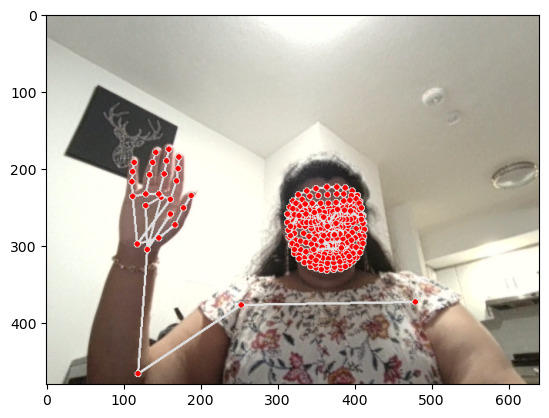

In [80]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [82]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

NameError: name 'results' is not defined

In [84]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [86]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [88]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [90]:
result_test = extract_keypoints(results)

In [92]:
result_test

array([ 0.57124758,  0.57305062, -0.57764965, ...,  0.1784219 ,
        0.40000933, -0.02624972])

In [94]:
np.save('0', result_test)

In [96]:
np.load('0.npy')

array([ 0.57124758,  0.57305062, -0.57764965, ...,  0.1784219 ,
        0.40000933, -0.02624972])

# 4. Setup Folders for Collection

In [98]:
import os
import numpy as np

# Path for exported data, numpy arrays
DATA_PATH = os.path.join('C:\\Harosha\\ML Projects\\Sign_Language_Detector\\Data')

# Actions that we try to detect
#actions = np.array(['Hello', 'ILoveYou', 'No', 'Yes', 'Thankyou', 'Please', 'Sorry' ])

#actions = np.array(['Hello', 'ILoveYou', 'No', 'Yes', 'ThankYou', 'Please', 'Sorry',  'A', 'E', 'F', 'H', 'I', 'M', 'N', 'O', 'R', 'S', 'T', 'My', 'Name'])
actions = np.array(['R'])

# Number of sequences (videos worth of data)
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Start folder (for labeling the new sequences)
start_folder = 0

for action in actions: 
    action_path = os.path.join(DATA_PATH, action)
    
    # Create the action directory if it does not exist
    if not os.path.exists(action_path):
        print(f"Creating directory for {action}: {action_path}")
        os.makedirs(action_path)

    # Check if the directory contains any existing sequences
    try:
        dirmax = np.max(np.array(os.listdir(action_path)).astype(int))  # Find max directory number
    except ValueError:  # Handles empty directories where os.listdir() returns an empty list
        dirmax = start_folder
    
    # Create directories for the new sequences
    for sequence in range(start_folder, start_folder + no_sequences):
        sequence_path = os.path.join(action_path, str(sequence))
        if not os.path.exists(sequence_path):
            print(f"Creating directory for sequence {sequence} in {action}")
            os.makedirs(sequence_path)

Creating directory for R: C:\Harosha\ML Projects\Sign_Language_Detector\Data\R
Creating directory for sequence 0 in R
Creating directory for sequence 1 in R
Creating directory for sequence 2 in R
Creating directory for sequence 3 in R
Creating directory for sequence 4 in R
Creating directory for sequence 5 in R
Creating directory for sequence 6 in R
Creating directory for sequence 7 in R
Creating directory for sequence 8 in R
Creating directory for sequence 9 in R
Creating directory for sequence 10 in R
Creating directory for sequence 11 in R
Creating directory for sequence 12 in R
Creating directory for sequence 13 in R
Creating directory for sequence 14 in R
Creating directory for sequence 15 in R
Creating directory for sequence 16 in R
Creating directory for sequence 17 in R
Creating directory for sequence 18 in R
Creating directory for sequence 19 in R
Creating directory for sequence 20 in R
Creating directory for sequence 21 in R
Creating directory for sequence 22 in R
Creating di

# 5. Collect Keypoint Values for Training and Testing

In [38]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('C:\\Harosha\\ML Projects\\Sign_Language_Detector\\Data')

# Actions that we try to detect
#actions = np.array(['Hello', 'ILoveYou', 'No', 'Yes', 'Thankyou', 'Please', 'Sorry' ])
#actions = np.array([ 'A', 'E', 'F', 'H', 'I', 'M', 'N', 'O', 'S', 'T', 'My', 'Name'])
actions = np.array([ 'R'])
# Number of sequences (videos worth of data)
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Start folder (for labeling the new sequences)
start_folder = 0

In [102]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [40]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [41]:
actions = np.array(['Hello', 'ILoveYou', 'No', 'Yes', 'ThankYou', 'Please', 'Sorry',  'A', 'E', 'F', 'H', 'I', 'M', 'N', 'O', 'R', 'S', 'T', 'My', 'Name'])


In [42]:
label_map = {label:num for num, label in enumerate(actions)}

In [46]:
label_map

{'Hello': 0,
 'ILoveYou': 1,
 'No': 2,
 'Yes': 3,
 'ThankYou': 4,
 'Please': 5,
 'Sorry': 6,
 'A': 7,
 'E': 8,
 'F': 9,
 'H': 10,
 'I': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'R': 15,
 'S': 16,
 'T': 17,
 'My': 18,
 'Name': 19}

In [48]:
DATA_PATH = os.path.join('C:\\Harosha\\ML Projects\\Sign_Language_Detector\\Data')

In [50]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [51]:
np.array(sequences).shape

(600, 30, 1662)

In [52]:
np.array(labels).shape

(600,)

In [53]:
X = np.array(sequences)

In [54]:
X.shape

(600, 30, 1662)

In [55]:
y = to_categorical(labels).astype(int)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [57]:
y_test.shape

(30, 20)

# 7. Build and Train LSTM Neural Network

In [59]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [60]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [61]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam

# Map labels to numeric values
label_map = {label:num for num, label in enumerate(actions)}


In [62]:
label_map

{'Hello': 0,
 'ILoveYou': 1,
 'No': 2,
 'Yes': 3,
 'ThankYou': 4,
 'Please': 5,
 'Sorry': 6,
 'A': 7,
 'E': 8,
 'F': 9,
 'H': 10,
 'I': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'R': 15,
 'S': 16,
 'T': 17,
 'My': 18,
 'Name': 19}

In [63]:
# Load sequences and labels
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [64]:
# Convert data to numpy arrays
X = np.array(sequences)
y = to_categorical(labels).astype(int)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [65]:
# Define the model
model = Sequential()
model.add(LSTM(128, return_sequences=True, activation='relu', input_shape=(30, 1662)))  # Increased units
model.add(Dropout(0.2))  # Add dropout for regularization
model.add(LSTM(256, return_sequences=True, activation='relu'))  # Increased units
model.add(Dropout(0.3))  # More dropout
model.add(LSTM(128, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))  # Dropout
model.add(Dense(actions.shape[0], activation='softmax'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0001)  # Lower learning rate
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train the model
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)
model.fit(X_train, y_train, epochs=1000, batch_size=32, callbacks=[tb_callback], validation_data=(X_test, y_test))


Epoch 1/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 187ms/step - categorical_accuracy: 0.0600 - loss: 2.9793 - val_categorical_accuracy: 0.1333 - val_loss: 2.8536
Epoch 2/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - categorical_accuracy: 0.0962 - loss: 2.9318 - val_categorical_accuracy: 0.1000 - val_loss: 2.5791
Epoch 3/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - categorical_accuracy: 0.0884 - loss: 2.8078 - val_categorical_accuracy: 0.1333 - val_loss: 2.3766
Epoch 4/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - categorical_accuracy: 0.1579 - loss: 2.6150 - val_categorical_accuracy: 0.2000 - val_loss: 2.3350
Epoch 5/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - categorical_accuracy: 0.1865 - loss: 2.5047 - val_categorical_accuracy: 0.2000 - val_loss: 2.2000
Epoch 6/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - categorical_accuracy: 0.2040 - loss: 2.4583 - val_categorical_accuracy: 0.2000 - val_loss: 2.2515
Epoch 7/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - categorical_accuracy: 0

In [ ]:
model.summary()

# 8. Make Predictions

In [ ]:
res = model.predict(X_test)

In [ ]:
actions[np.argmax(res[4])]

In [ ]:
actions[np.argmax(y_test[4])]

# 9. Save Weights

In [ ]:
model.save('action_V2_20.keras')

In [ ]:
model.load_weights('action_V2_20.keras')

# 10. Evaluation using Confusion Matrix and Accuracy

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
yhat = model.predict(X_test)

In [ ]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
multilabel_confusion_matrix(ytrue, yhat)

In [ ]:
accuracy_score(ytrue, yhat)

# 11. Test in Real Time

In [ ]:
from scipy import stats

In [ ]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        # Ensure prob is a scalar, taking the first element if it's an array or list
        if isinstance(prob, (list, np.ndarray)):
            prob = prob[0]  # Or use max(prob) if that fits your logic better

        # Draw the probability bar as a rectangle
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), colors[num], -1)
        
        # Add action label on top of the bar
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
    return output_frame


In [ ]:
print(res)
print(type(res), res.shape)


In [ ]:
import matplotlib.pyplot as plt
import random

# Function to visualize the probabilities
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    
    # Ensure we have enough colors for the number of actions
    if len(colors) < len(actions):
        # Extend color list if needed by looping over existing colors
        while len(colors) < len(actions):
            colors.append(random.choice(colors))
    
    # Limit actions to match the length of probabilities (res)
    for num, prob in enumerate(res[:len(actions)]):  # To avoid mismatch issues
        if isinstance(prob, (list, np.ndarray)):
            prob = prob[0]  # Use max(prob) or adjust if logic requires
        
        # Ensure probability is in valid range (0 to 1)
        prob = max(0, min(prob, 1))
        
        # Draw the probability bar as a rectangle
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), colors[num], -1)
        
        # Add action label on top of the bar
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
    return output_frame

# Assuming you have res, actions, image, and colors ready
plt.figure(figsize=(18, 18))
plt.imshow(prob_viz(res, actions, image, colors))
plt.show()


In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()